In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.ticker import MaxNLocator


In [131]:
# for testing
mcfiles = ['../dsa_mc/testing_test.npy']
# mcfiles = ['../dsa_mc/roots_95_test/roots_95.npy']

# for different center of mass energies
# rs_arr = ['55', '95', '135']
# mcfiles = [f'../dsa_mc/mc_data/roots_{rs}/roots_{rs}_240k.npy' for rs in rs_arr]

# for different replicas
# mcfiles = [
#     f'../dsa_mc/roots_95/roots_95_100k.npy',
#     f'../dsa_mc/roots_95_trial2/roots_95_100k_trial2.npy',
#     f'../dsa_mc/roots_95_trial3/roots_95_100k_trial3.npy'
#           ]

columns = ['x', 'y', 'z', 'gauss']

mc_dfs = []
for ifile, mcfile in enumerate(mcfiles):
    mcdata = np.load(mcfile)
    mc_df = pd.DataFrame(mcdata, columns=columns)
    mc_dfs.append(mc_df)


In [133]:
mc_dfs[0].tail()

,x,y,z,gauss
999995,-0.241553,0.566743,0.003482,0.684164
999996,0.557784,0.216398,0.402204,0.594687
999997,-0.275041,-0.271366,-0.662880,0.555050
999998,-0.774641,-0.798179,0.206497,0.278093
999999,-0.643884,0.026115,0.051733,0.658398


In [145]:
# function to plot histograms

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

def plot_histogram(data, constraints={}, **options):

    asp_ratio = 4/3
    psize = 5

    fig, ax = plt.subplots(1, 1, figsize=(asp_ratio*psize, psize))
        
    # colors = ['black']

    ax.scatter(
        data['bin centers'], data['data']
    )
           
    # set plot info
    if options.get('y_limits'): ax.set_ylim(options.get('y_limits'))
    # ax.set_xlim(options.get('x_limits', [plot_bins[0], plot_bins[-1]]))
    ax.set_title(options.get('title', ''), pad=10)
    ax.set_ylabel(options.get('y_label', ''), loc='top')
    ax.set_xlabel(options.get('x_label', ''), loc='center')
    ax.set_yscale(options.get('y_scale', 'linear'))
    ax.set_xscale(options.get('x_scale', 'linear'))
    # ax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    ax.tick_params(which='both', direction="in", length=5, width=1)
    ax.grid(options.get('grid', False)) 
    ax.xaxis.set_major_locator(MaxNLocator(nbins=15))
    if options.get('zero_line', False): ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
    if options.get('one_line', False): ax.axhline(y=1, color='gray', linestyle='--', linewidth=1)
    if options.get('min_pT_line', False) and plot_var == 'pT': 
        ax.axvline(x=1, color='gray', linestyle='--')
        ax.fill_betweenx(ax.get_ylim(), ax.get_xlim()[0], 1, color='gray', alpha=0.25)
    plt.tight_layout()
    if options.get('saveas'): 
        if 'DNS' in options.get('saveas'): 
            pass
        else:
            fig.savefig(options.get('saveas'), dpi=400, bbox_inches="tight")



def cut_data(df, var, constraints={}, **options):
 
    # get bins
    bins = options.get('bins')
    nbins = len(bins)
    bin_width = bins[1] - bins[0]
    bin_centers = 0.5*(bins[:-1]+bins[1:])

    print(bin_width)

    # enforce constraints
    # mask = pd.Series(True, index=df.index)
    # for ivar, (low, high) in constraints.items(): mask &= df[ivar].between(low, high)
    # fixed_df = df[mask]

    fixed_df = df

    if fixed_df.empty:
        print('Error: cut data is empty - constraints are too strict')
        return

    # get phase space volume
    phase_space_volume = 1
    for jvar in ['x', 'y', 'z']: 
        if jvar == var: 
            print('??')
            continue

        var_min = fixed_df[jvar].min()
        var_max = fixed_df[jvar].max()

        phase_space_volume *= var_max - var_min

    print(phase_space_volume)
    nevents = fixed_df.shape[0]

    print(nevents)

        
    # make plot data 
    gauss_counts, _ = np.histogram(fixed_df[var], bins=bins, weights=fixed_df['gauss'])
    gauss_counts = np.array(gauss_counts)*(phase_space_volume/nevents)*(1/(bin_width))

    integral_estimate = np.sum(gauss_counts * bin_width)
    print(integral_estimate)

  
    return {'data': gauss_counts, 'bin centers': bin_centers}



0.002002002002001957
??
3.9999879268317717
1000000
1.6666455017605541


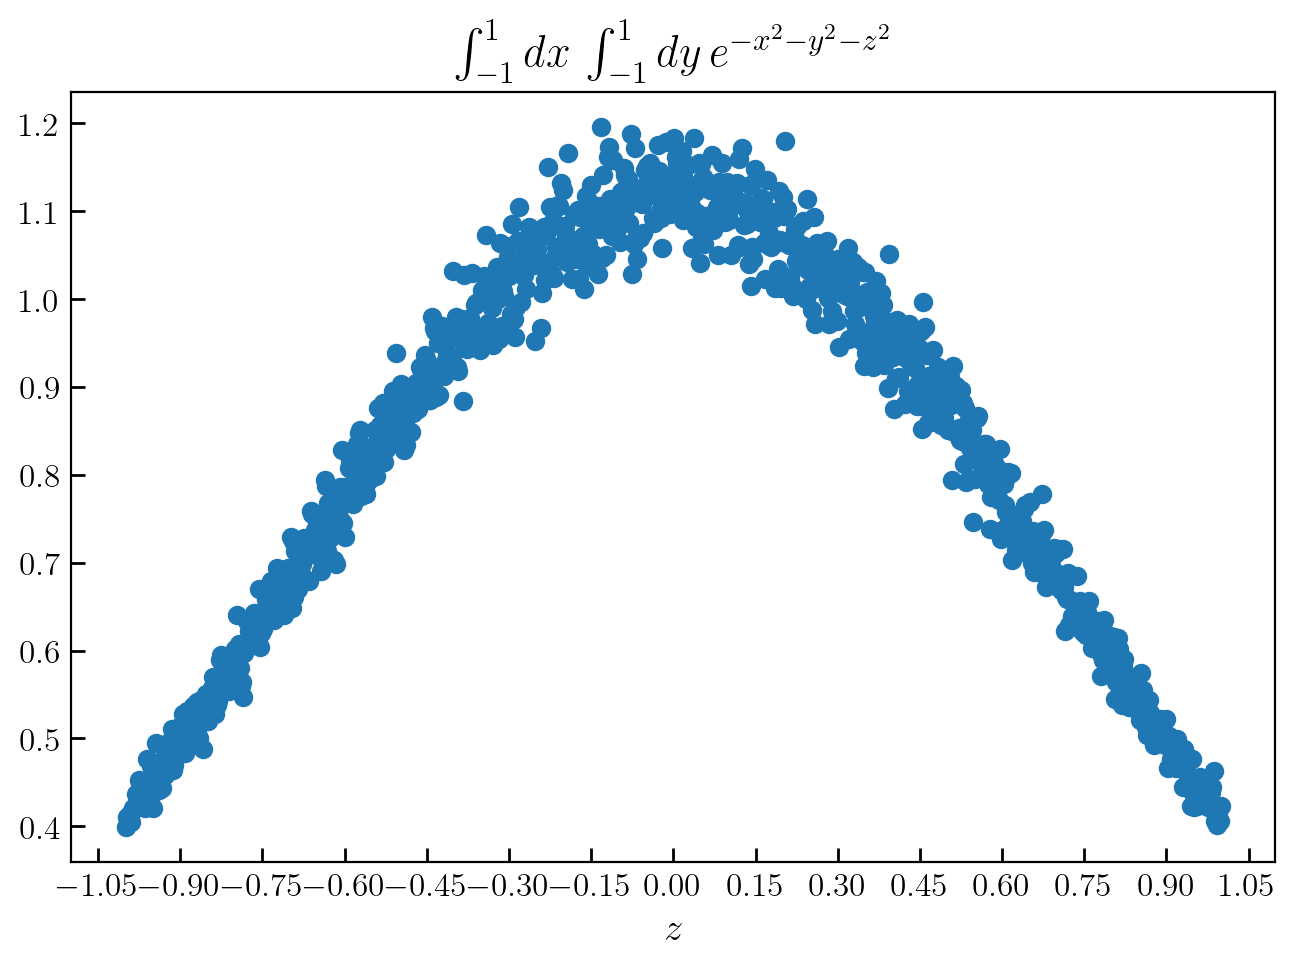

In [157]:
# plot relevant quantities 

z_bins = np.linspace(-1, 1, num=1000)

# print(z_bins)
cuts = {}

tdata = cut_data(mc_dfs[0], 'z', cuts, bins=z_bins)
tag = 'DNS'

plot_histogram(tdata,
               labels = labels,
               # efficiency = 1, 
               # y_scale='log', 
               # x_scale='log',
               # x_limits = [5, 11], 
               bins = z_bins,
               # y_limits = [-0.000002, 0.000003],
               # one_line = True,
               # zero_line = True,
               # plot_ratio=False,
                # rel_error=True,
               # info_box = True,
               # roots_label=True,
               title=r'$\int^{1}_{-1} dx \, \int^{1}_{-1} dy \, e^{-x^2 - y^2 - z^2}$', 
               # title=r'$\delta_{\mathrm{rel.}}  \langle  \cos \phi_{\Delta p}  \rangle $',
               x_label=r'$z$',
               saveas = f'plots/cos_{tag}.pdf'
              )






In [153]:
# manually histogram things

tdf = mc_dfs[0] 
z_hist = []
for iz, z in enumerate(z_bins):
    if iz == len(z_bins)-1: continue
    lower = z
    upper = z_bins[iz+1]

    bin_value = tdf.loc[(tdf['z'] > lower) & (tdf['z'] < upper), 'gauss'].sum()

    bin_value *= 4*(1/(upper-lower))*(1/tdf.shape[0])
    bin_center = (upper + lower)*0.5

    print(bin_center, bin_value)


    





-0.9898989898989898 0.4139181013382463
-0.9696969696969697 0.44110204348646914
-0.9494949494949495 0.44643397365115484
-0.9292929292929293 0.4621693641366935
-0.9090909090909092 0.48995524159193926
-0.8888888888888888 0.5081535905636473
-0.8686868686868687 0.5227171907147361
-0.8484848484848484 0.5388187367261084
-0.8282828282828283 0.5613679046994443
-0.8080808080808081 0.5783642429841039
-0.7878787878787878 0.5937805141563571
-0.7676767676767677 0.6244857578373283
-0.7474747474747474 0.6381549330168913
-0.7272727272727273 0.6664382597359361
-0.7070707070707071 0.680138796362641
-0.6868686868686869 0.6917926959785363
-0.6666666666666666 0.7214130632889193
-0.6464646464646464 0.7288661242078058
-0.6262626262626263 0.7442917249094687
-0.606060606060606 0.7608408250950313
-0.5858585858585859 0.8002941100594249
-0.5656565656565656 0.8113451102755718
-0.5454545454545454 0.8272427774666755
-0.5252525252525252 0.849982762879119
-0.505050505050505 0.8841024611794904
-0.4848484848484848 0.8572